In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the MNIST dataset
mnist = keras.datasets.mnist

In [4]:
#Training Set and Test Set
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(training_images.shape)   #60k 28x28 grayscale images
print(training_labels.shape)
print(test_images.shape)       #10k 28x28 grayscale images
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


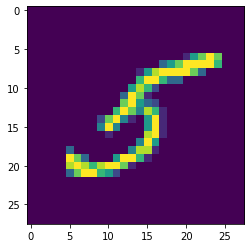

In [8]:
plt.imshow(training_images[35])
#print(training_images[35])
print(training_labels[35])

In [9]:
#normalization of the training_set and test_set
training_images = training_images/255
test_images = test_images/255

In [10]:
#model structure: Linear->ReLU ->Linear->Softmax
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(units=512, activation=tf.nn.relu),
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [11]:
#Loss Function : Cross-Entropy Loss, Optimization Strategy : Adam
model.compile(optimizer=tf.optimizers.Adam(), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
#code that stops training once the model reaches desired performance
accuracy_threshold = 0.99               #desired accuracy   
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=accuracy_threshold):
      print("\nReached desired performance, so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
#Training the model
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0820 - accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9912

Reached desired performance, so cancelling training!


In [16]:
#test_set performance
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9802


[0.06678398698568344, 0.9801999926567078]

In [19]:
#model predictions
predictions = model.predict(test_images)

In [21]:
random_test_image = 5
print(predictions[random_test_image])
print(np.argmax(predictions[random_test_image]))

[2.7990521e-10 9.9984407e-01 4.1877235e-09 7.2934164e-10 5.5527476e-06
 4.1540466e-10 1.3361786e-09 1.4524798e-04 4.9956884e-06 1.4129996e-08]
1


1


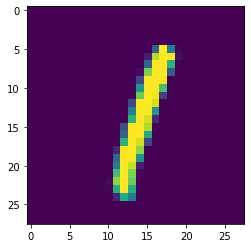

In [23]:
print(test_labels[random_test_image])
plt.imshow(test_images[random_test_image])